<a href="https://colab.research.google.com/github/SterlingHayden/Convex-Optimization/blob/main/cvxpy-implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sterling Hayden  
DASC 3203: Optimization Methods in Data Science
Homework 6

In [ ]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sympy as sym

## Question 1

In [ ]:
# m = 25 data points
# n = 2 features
X = np.array([[2,50],[8,110],[11,120],[10,550],[8,295],[4,200],[2,375],[2,52],[9,100],[8,300],[4,412],[11,400],[12,500],[2,360],[4,205],[4,400],[20,600],[1,585],[10,540],[15,250],[15,290],[16,510],[17,590],[6,100],[5,400]])
col_min = np.min(X, axis=0)
col_max = np.max(X, axis=0)
X = (X - col_min)/(col_max - col_min)
y = np.array([9.95, 24.45, 31.75, 35.00, 25.02, 16.86, 14.38, 9.60, 24.35, 27.50, 17.08, 37.00, 41.95, 11.66, 26.65, 17.89, 69.00, 10.30, 34.93, 46.59, 44.88, 54.12, 56.63, 22.13, 21.15])
# ^^^^^^^^^^^^^^Do i need to standerdize y?^^^^^^^^^^
e = np.ones(len(X))

In [ ]:
print(X)
print(y)

[[0.05263158 0.        ]
 [0.36842105 0.10909091]
 [0.52631579 0.12727273]
 [0.47368421 0.90909091]
 [0.36842105 0.44545455]
 [0.15789474 0.27272727]
 [0.05263158 0.59090909]
 [0.05263158 0.00363636]
 [0.42105263 0.09090909]
 [0.36842105 0.45454545]
 [0.15789474 0.65818182]
 [0.52631579 0.63636364]
 [0.57894737 0.81818182]
 [0.05263158 0.56363636]
 [0.15789474 0.28181818]
 [0.15789474 0.63636364]
 [1.         1.        ]
 [0.         0.97272727]
 [0.47368421 0.89090909]
 [0.73684211 0.36363636]
 [0.73684211 0.43636364]
 [0.78947368 0.83636364]
 [0.84210526 0.98181818]
 [0.26315789 0.09090909]
 [0.21052632 0.63636364]]
[ 9.95 24.45 31.75 35.   25.02 16.86 14.38  9.6  24.35 27.5  17.08 37.
 41.95 11.66 26.65 17.89 69.   10.3  34.93 46.59 44.88 54.12 56.63 22.13
 21.15]


In [ ]:
# Variables
b = cp.Variable()
beta = cp.Variable(2)

In [ ]:
lambdas = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
LambdaBeta_values = np.zeros((len(lambdas), 2))

for i, lambd in enumerate(lambdas):
    obj =  cp.Minimize(cp.sum_squares(b*e - X@beta - y) + lambd*cp.norm(beta,1))
    #obj =  cp.Minimize(cp.sum_squares(b*e - X@beta - y) + lambd*cp.norm(beta))
    prob = cp.Problem(obj)
    prob.solve()
    LambdaBeta_values[i, :] = beta.value

In [ ]:
LambdaBeta_values

array([[-5.16957492e+01, -6.58930310e+00],
       [-5.16939247e+01, -6.58815645e+00],
       [-5.16756792e+01, -6.57668993e+00],
       [-5.14932248e+01, -6.46202481e+00],
       [-4.96686803e+01, -5.31537360e+00],
       [-2.87359007e+01,  5.20340333e-22],
       [ 5.77001706e-20,  7.77126255e-20],
       [ 5.68051987e-18,  7.63703128e-18]])

In [ ]:
print(LambdaBeta_values.shape)
print(len(lambdas))

(8, 2)
8


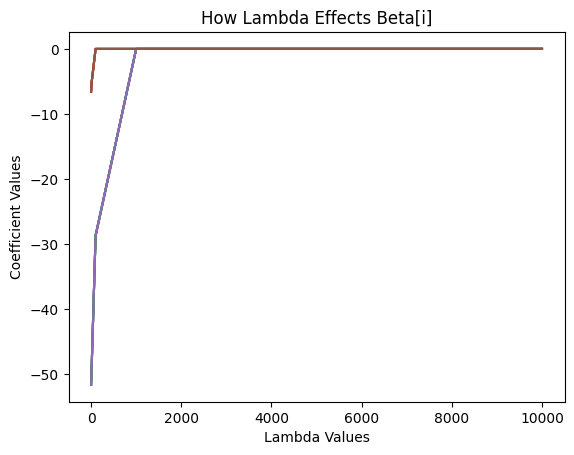

In [ ]:
fig, ax = plt.subplots()
for i in range(len(lambdas)):
    ax.plot(lambdas, LambdaBeta_values)
ax.set_xlabel('Lambda Values')
ax.set_ylabel('Coefficient Values')
ax.set_title('How Lambda Effects Beta[i]')
plt.show()



The red line represents beta[2] and the the blue line represents beta[1].   
beta[1] moves to 0 slower than beta[2], thus we can infer that beta[1] is the more important feature.  
Once lambda gets to be around 1000 all beta values are roughly 0.

## Question 2

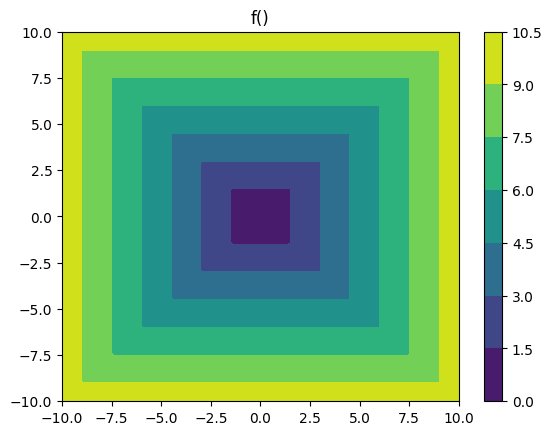

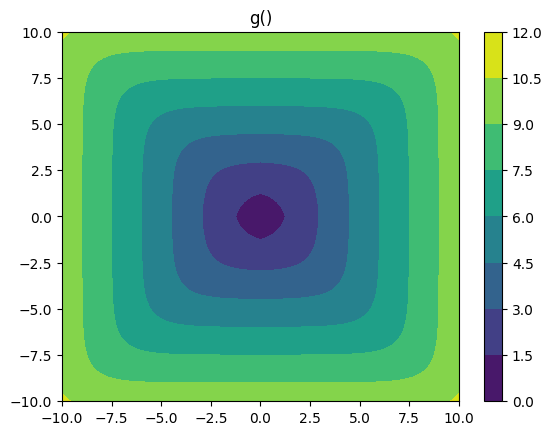

In [ ]:
# f()
def f(z1, z2):
  return np.maximum(np.abs(z1), np.abs(z2))

# g()
def g(z1, z2):
  return np.log(np.exp(np.abs(z1)) + np.exp(np.abs(z2)))

# create z1 and z2
z1 = np.arange(-10,10.1,.1)
z2 = np.arange(-10,10.1,.1)

# Fixes dimensionality issue
z1, z2 = np.meshgrid(z1, z2)

plt.contourf(z1, z2, f(z1,z2))
plt.colorbar()
plt.title("f()")
plt.show()
plt.contourf(z1, z2, g(z1,z2))
plt.colorbar()
plt.title("g()")
plt.show()

f(z1,z2) and g(z1,z2) have similar gradients, with f(z1,z2)'s gradient being squares and g(z1,z2)'s gradient being rounded out squares. On an interesting note, g(z1,z2) at its highest point is 12 vs f(z1,z2) at 10.5.

## Question 3

In [ ]:
beta = cp.Variable(2)

# is cp.sum correct?
obj = cp.Minimize( cp.log_sum_exp( cp.abs(b*e + X@beta - y) ) )

prob = cp.Problem(obj)
prob.solve()

8.084090404039605

In [ ]:
print(beta.value)
print(b.value)

[47.35692956  5.76423466]
10.334085032534686


In [ ]:
residuals = y - (b.value + X @ beta.value)
print(residuals)

[-2.87655501 -3.96020047 -4.24241466 -3.00652815 -5.3290794  -2.52355896
 -1.85269367 -3.24751586 -6.44786618 -2.90148153 -4.52540941 -1.92693413
 -0.51744677 -4.41548727  7.21403891 -3.58964429  5.54475075 -5.64111329
 -2.97172388 -0.73475004 -2.8639671   1.57786906  0.75696495 -1.19045625
 -2.82211427]


In [ ]:
OLS = cp.Minimize(cp.sum_squares(b*e - X@beta - y))
prob = cp.Problem(OLS)
prob.solve()
residuals = y - (b.value + X @ beta.value)
print(residuals)

[  6.51262344  38.05650786  53.63883441  59.31973141  40.84295267
  20.66142001  14.83637783   6.18658501  40.55753961  43.38285658
  23.42134594  62.24345358  71.11237143  11.93666609  30.51132392
  24.08757655 121.1271663   10.55150263  59.12992359  80.91969447
  79.68892578  94.28553756 100.47483975  30.17502088  30.06841613]


OLS has much larger residuals. We would want to use the other model in all instances as lower residuals equate to a better fit model.

## Question 4
####Convex

In [ ]:
x1, x2, x3 = sym.symbols('x1 x2 x3')
f = 2*x1 - x2 + 4*x3 - 5*x1**2 - 2*(x2-1)**2 - 4*(x3-1)**2 + 6*x1*x2 + 2*x1*x3

hessian = sym.hessian(-f, (x1, x2, x3))
hessian = np.array(hessian)
print(hessian)
p = np.array([2,-1,4])
print(p)

[[10 -6 -2]
 [-6 4 0]
 [-2 0 8]]
[ 2 -1  4]


In [ ]:
#Build CVXPY model
x = cp.Variable(3) # defines variables x[0] and x[1]
obj = cp.Minimize(0.5*cp.quad_form(x,hessian) + p.T @ x) # use @ for matrix-matrix multiplication

In [ ]:
prob = cp.Problem(obj)
prob.solve()
print("Optimal Objective Value: ", prob.value)
print("Optimal Solution: ", x.value)

Optimal Objective Value:  -3.3750000000000027
Optimal Solution:  [-3.   -4.25 -1.25]


## Question 5
####Not Convex

In [ ]:
x1, x2, x3 = sym.symbols('x1 x2 x3')
f = 2*x1 - x2 + 4*x3 - 3*x1**2 - 2*(x2-1)**2 - 4*(x3-1)**2 + 6*x1*x2 + 2*x1*x3

hessian = sym.hessian(-f, (x1, x2, x3))
hessian = np.array(hessian)
print(hessian)
p = np.array([2,-1,4])
print(p)

[[6 -6 -2]
 [-6 4 0]
 [-2 0 8]]
[ 2 -1  4]


In [ ]:
#Build CVXPY model
x = cp.Variable(3) # defines variables x[0] and x[1]
obj = cp.Minimize(0.5*cp.quad_form(x,hessian) + p.T @ x) # use @ for matrix-matrix multiplication

In [ ]:
prob = cp.Problem(obj)
prob.solve()
print("Optimal Objective Value: ", prob.value)
print("Optimal Solution: ", x.value)

DCPError: ignored

## Question 7

In [ ]:
x = cp.Variable(2, nonneg=True)
obj = cp.Minimize(cp.xexp(x[0]) + 0.5*cp.xexp(x[1]))

constraints = [cp.log(3*x[0] + 1) + 1.5*cp.log(2*x[1] + 1) >= 3, x[0] + 2*x[1] >= 3]

In [ ]:
prob = cp.Problem(obj, constraints)
prob.solve()
print("Optimal Objective Value: ", prob.value)
print("Optimal Solution: ", x.value)

Optimal Objective Value:  3.521523964797268
Optimal Solution:  [0.74951341 1.18435434]
